# 单层线性神经网络

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

torch.set_printoptions(edgeitems=2, threshold=50)

## 处理输入数据，分割数据集，

In [3]:
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

In [4]:
x = torch.tensor(x).unsqueeze(1)
y = torch.tensor(y).unsqueeze(1)
x, x.shape, y, y.shape

(tensor([[35.7000],
         [55.9000],
         [58.2000],
         [81.9000],
         [56.3000],
         [48.9000],
         [33.9000],
         [21.8000],
         [48.4000],
         [60.4000],
         [68.4000]]),
 torch.Size([11, 1]),
 tensor([[ 0.5000],
         [14.0000],
         [15.0000],
         [28.0000],
         [11.0000],
         [ 8.0000],
         [ 3.0000],
         [-4.0000],
         [ 6.0000],
         [13.0000],
         [21.0000]]),
 torch.Size([11, 1]))

In [5]:
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)

In [6]:
shuffled_indices = torch.randperm(n_samples)

In [7]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 2,  7,  6,  0,  8,  5, 10,  1,  3]), tensor([9, 4]))

In [8]:
train_x = x[train_indices]
train_y = y[train_indices]
val_x = x[val_indices]
val_y = y[val_indices]

train_x_scaled = 0.1 * train_x
val_x_scaled = 0.1 * val_x

In [9]:
train_x_scaled, val_x_scaled

(tensor([[5.8200],
         [2.1800],
         [3.3900],
         [3.5700],
         [4.8400],
         [4.8900],
         [6.8400],
         [5.5900],
         [8.1900]]),
 tensor([[6.0400],
         [5.6300]]))

## 构建线性层

In [10]:
linear_model = nn.Linear(1, 1)  # input size, output size
linear_model(val_x_scaled)

tensor([[3.0014],
        [2.7705]], grad_fn=<AddmmBackward0>)

In [11]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.5632]], requires_grad=True),
 Parameter containing:
 tensor([-0.4002], requires_grad=True))

In [12]:
a = torch.ones(1)
a, a.shape, a[0]

(tensor([1.]), torch.Size([1]), tensor(1.))

In [13]:
b = torch.ones(())
b, b.shape
# b[0]  # error

(tensor(1.), torch.Size([]))

b的尺寸为0D，无法作为网络输入

In [14]:
linear_model(a)
# linear_model(b) # error: both arguments to linear need to be at least 1D, but they are 0D and 2D

tensor([0.1630], grad_fn=<ViewBackward0>)

In [15]:
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [16]:
# 直接调用linear_model的parameters()方法，返回的是一个生成器，而不是一个列表
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.5632]], requires_grad=True),
 Parameter containing:
 tensor([-0.4002], requires_grad=True)]

In [17]:
def loss_fn(y_pred, y):
    squared_diffs = (y_pred - y) ** 2
    return squared_diffs.mean()

In [18]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_x, val_x, train_y, val_y):
    for epoch in range(1, n_epochs + 1):
        train_y_pred = model(train_x)
        train_loss = loss_fn(train_y_pred, train_y)

        val_y_pred = model(val_x)
        val_loss = loss_fn(val_y_pred, val_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(
                f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}"
            )

In [19]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [20]:
training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

Epoch 1, Training loss 177.3156, Validation loss 123.0267
Epoch 500, Training loss 7.0432, Validation loss 5.3089
Epoch 1000, Training loss 3.0124, Validation loss 6.0925
Epoch 1500, Training loss 2.5025, Validation loss 6.3962
Epoch 2000, Training loss 2.4380, Validation loss 6.5073
Epoch 2500, Training loss 2.4298, Validation loss 6.5473
Epoch 3000, Training loss 2.4288, Validation loss 6.5615


In [21]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[5.4812]], requires_grad=True),
 Parameter containing:
 tensor([-17.4245], requires_grad=True)]

下面使用nn库自带的MSELoss()

In [22]:
training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

Epoch 1, Training loss 2.4288, Validation loss 6.5615
Epoch 500, Training loss 2.4286, Validation loss 6.5666
Epoch 1000, Training loss 2.4286, Validation loss 6.5684
Epoch 1500, Training loss 2.4286, Validation loss 6.5691
Epoch 2000, Training loss 2.4286, Validation loss 6.5693
Epoch 2500, Training loss 2.4286, Validation loss 6.5693
Epoch 3000, Training loss 2.4286, Validation loss 6.5693


In [23]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[5.4878]], requires_grad=True),
 Parameter containing:
 tensor([-17.4614], requires_grad=True)]

# 多层+激活层的简单神经网络

In [24]:
seq_model = nn.Sequential(nn.Linear(1, 13), nn.Tanh(), nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [25]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [26]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [27]:
from collections import OrderedDict

In [28]:
seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 8)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(8, 1)),
        ]
    )
)
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [29]:
seq_model.parameters()

<generator object Module.parameters at 0x000001FDCD683220>

In [31]:
list(seq_model.parameters())

[Parameter containing:
 tensor([[ 0.3860],
         [-0.8243],
         [-0.2552],
         [ 0.1557],
         [-0.8587],
         [-0.5456],
         [-0.5913],
         [ 0.3357]], requires_grad=True),
 Parameter containing:
 tensor([-0.5664,  0.5492, -0.2166, -0.4913,  0.0186,  0.9577,  0.5677, -0.5789],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.1996,  0.1714,  0.0026,  0.3154, -0.2053,  0.3294, -0.3436,  0.3363]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0496], requires_grad=True)]

In [32]:
list(seq_model.named_parameters())

[('hidden_linear.weight',
  Parameter containing:
  tensor([[ 0.3860],
          [-0.8243],
          [-0.2552],
          [ 0.1557],
          [-0.8587],
          [-0.5456],
          [-0.5913],
          [ 0.3357]], requires_grad=True)),
 ('hidden_linear.bias',
  Parameter containing:
  tensor([-0.5664,  0.5492, -0.2166, -0.4913,  0.0186,  0.9577,  0.5677, -0.5789],
         requires_grad=True)),
 ('output_linear.weight',
  Parameter containing:
  tensor([[ 0.1996,  0.1714,  0.0026,  0.3154, -0.2053,  0.3294, -0.3436,  0.3363]],
         requires_grad=True)),
 ('output_linear.bias',
  Parameter containing:
  tensor([0.0496], requires_grad=True))]

In [33]:
optimizer = optim.SGD(
    seq_model.parameters(), lr=1e-3
)  # 视频里说把这里的lr调低了以追求稳定性

In [34]:
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    train_x=train_x_scaled,
    val_x=val_x_scaled,
    train_y=train_y,
    val_y=val_y,
)

Epoch 1, Training loss 181.9039, Validation loss 128.4933
Epoch 500, Training loss 10.4131, Validation loss 6.6555
Epoch 1000, Training loss 4.5245, Validation loss 9.7954
Epoch 1500, Training loss 5.5398, Validation loss 0.5829
Epoch 2000, Training loss 3.0208, Validation loss 2.4530
Epoch 2500, Training loss 2.2769, Validation loss 3.3703
Epoch 3000, Training loss 1.8803, Validation loss 4.0589
Epoch 3500, Training loss 1.6566, Validation loss 4.5400
Epoch 4000, Training loss 1.5329, Validation loss 4.7989
Epoch 4500, Training loss 1.4614, Validation loss 4.9128
Epoch 5000, Training loss 1.4158, Validation loss 4.9611


In [35]:
print(f"output: {seq_model(val_x_scaled)}")
print(f"answer: {val_y}")
print(f"hidden: {seq_model.hidden_linear.weight.grad}")

output: tensor([[16.7767],
        [13.7638]], grad_fn=<AddmmBackward0>)
answer: tensor([[13.],
        [11.]])
hidden: tensor([[-1.1011e+01],
        [ 2.4202e-01],
        [ 3.2025e-02],
        [-1.0326e+01],
        [-6.6623e-03],
        [ 9.8108e+00],
        [ 1.1199e+01],
        [-1.1208e+01]])


In [36]:
import matplotlib.pyplot as plt

In [37]:
t_range = torch.arange(20.0, 90.0).unsqueeze(1)
t_range, t_range.shape

(tensor([[20.],
         [21.],
         ...,
         [88.],
         [89.]]),
 torch.Size([70, 1]))

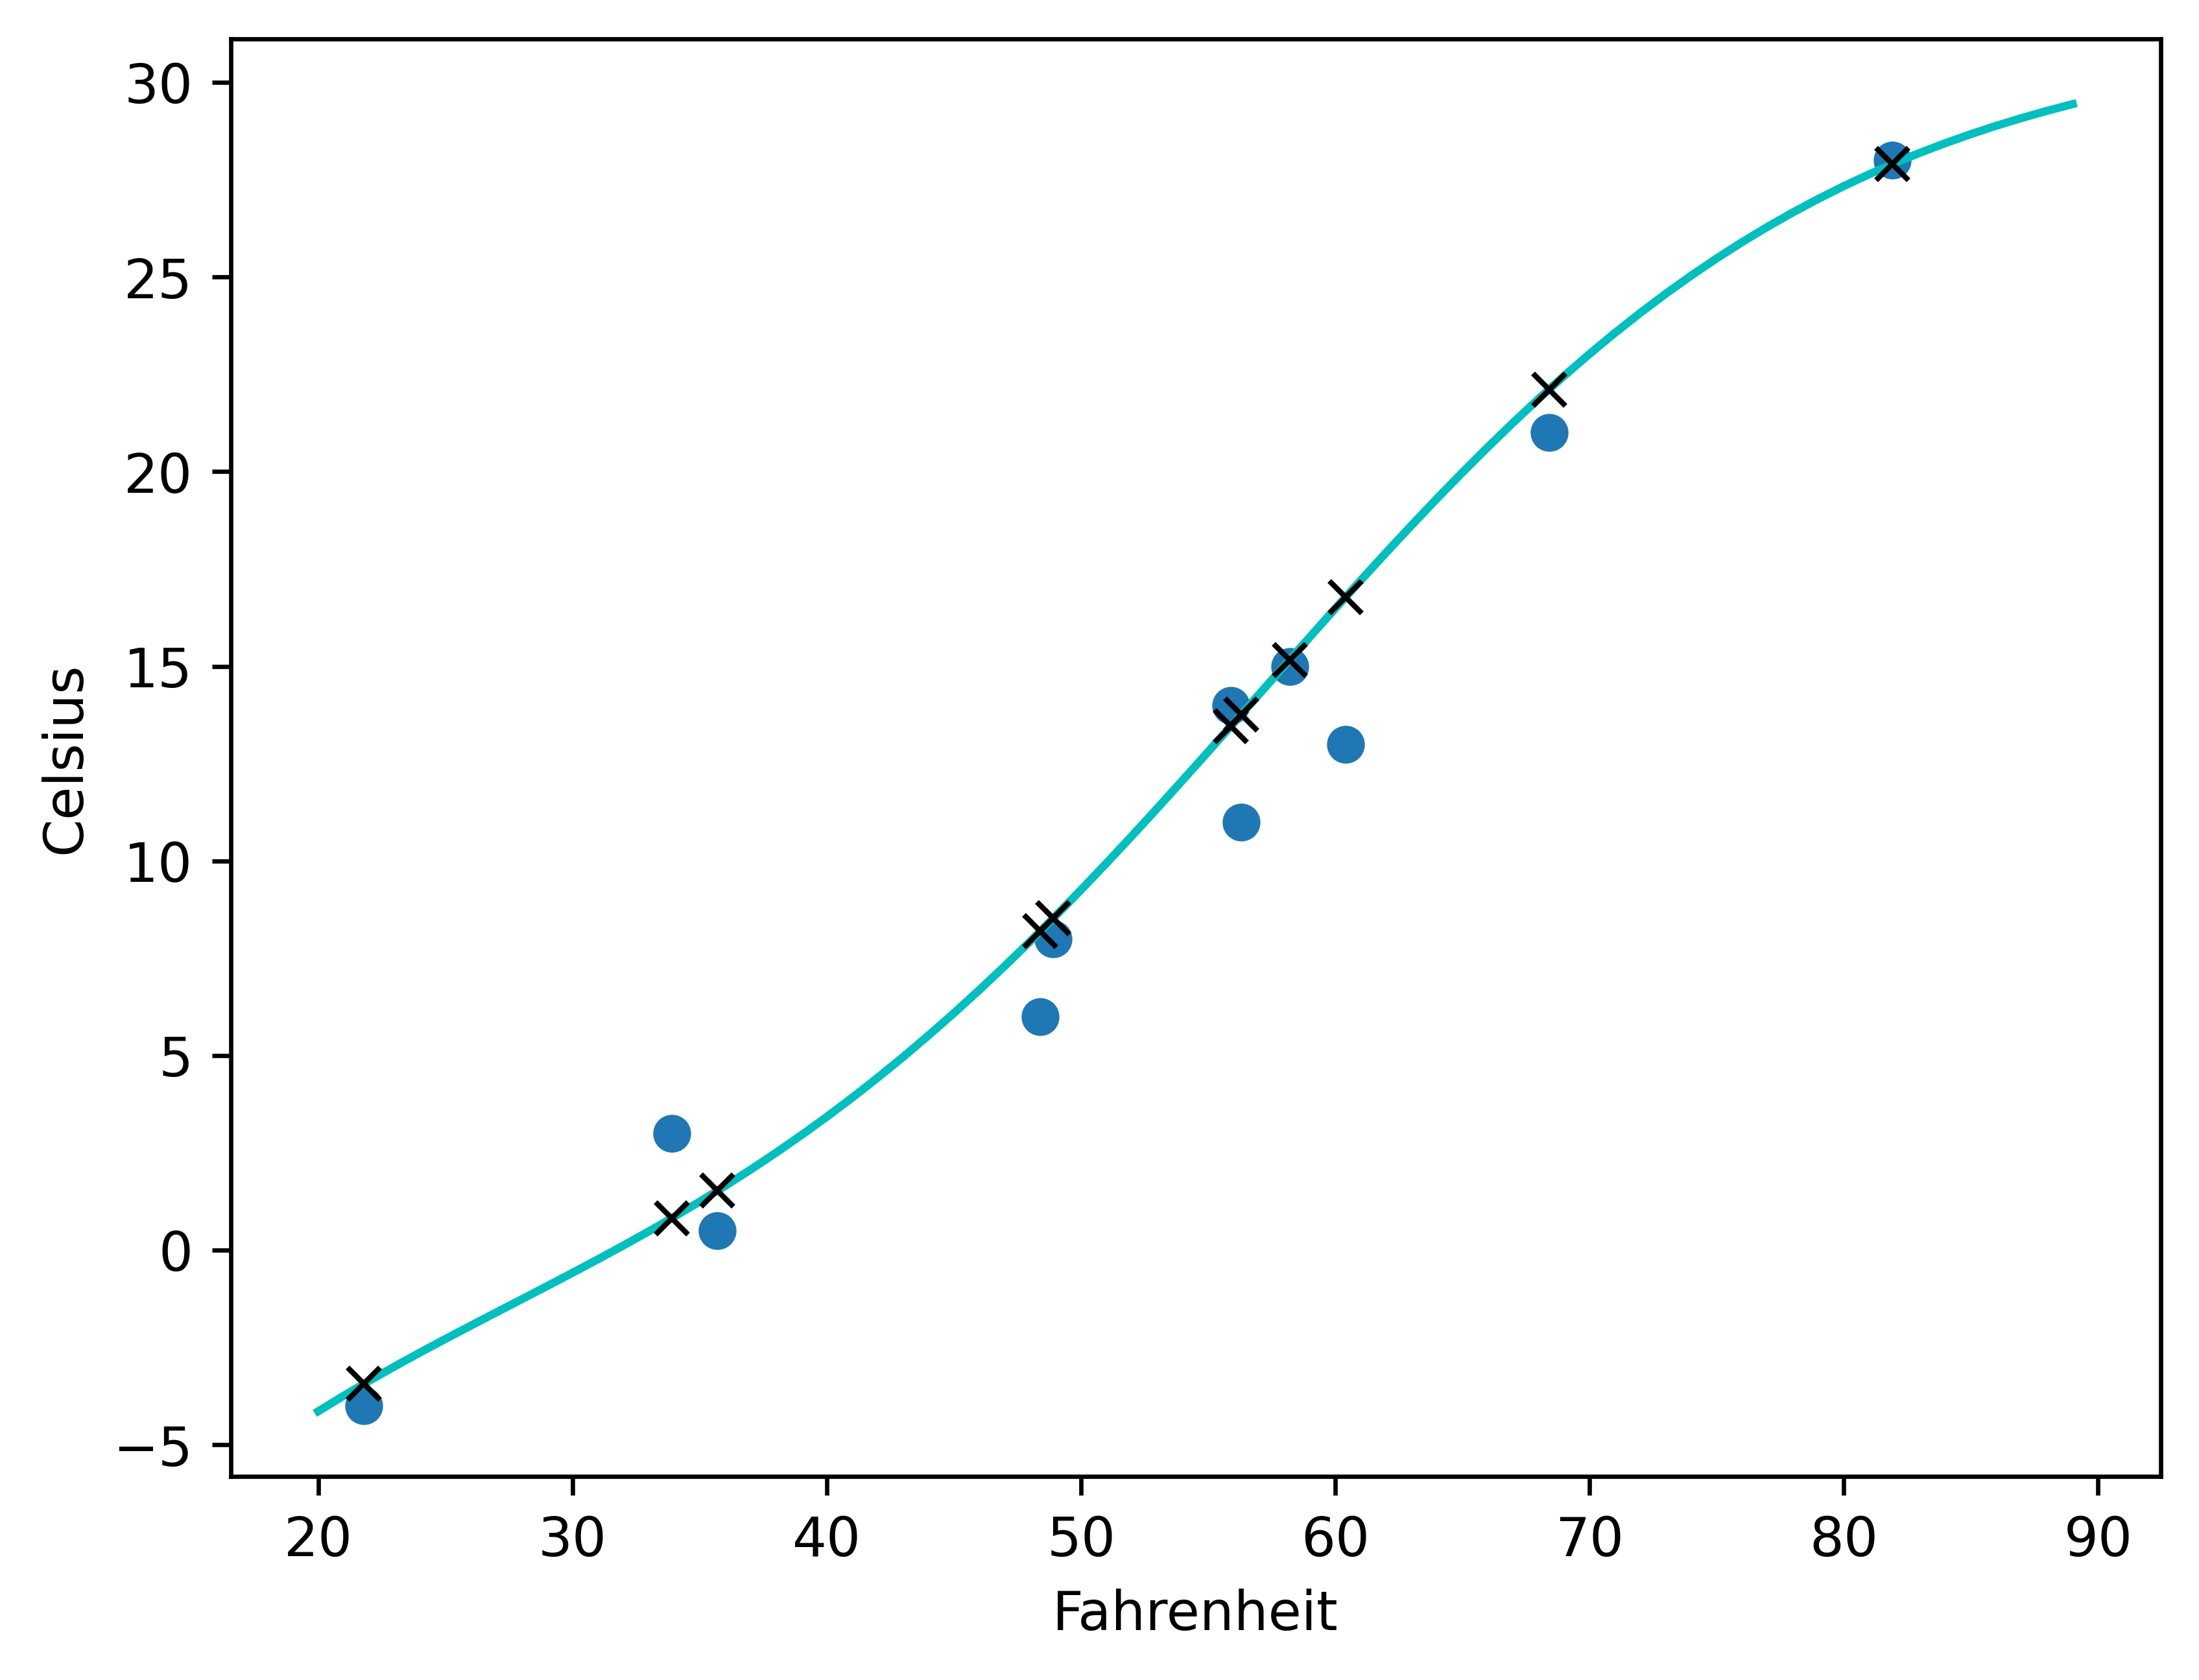

In [38]:
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), y.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), "kx")

In [42]:
class SubclassModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_linear = nn.Linear(1, 13)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(13, 1)

    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = self.hidden_activation(hidden_t)
        output_t = self.output_linear(activated_t)
        return output_t

In [43]:
subclass_model = SubclassModel()
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)